In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
plt.style.use('bmh')
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import read_csv

In [ ]:
# Use to load data on Google Colab
from google.colab import files 
uploaded = files.upload() 

Saving APT.csv to APT.csv


In [ ]:
#read the csv file
df = pd.read_csv('APT.csv',index_col="Date", parse_dates=True)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-29,2.70,2.70,2.65,2.70,2.70,53203
2017-06-30,2.68,2.95,2.68,2.95,2.95,21668
2017-07-03,3.02,3.08,3.00,3.00,3.00,61756
2017-07-04,3.00,3.02,2.99,3.00,3.00,64658
2017-07-05,3.00,3.20,2.99,3.18,3.18,443935
2017-07-06,3.20,3.20,3.13,3.15,3.15,308738
2017-07-07,3.15,3.18,3.06,3.11,3.11,261677
2017-07-10,3.15,3.15,2.85,2.93,2.93,431289
2017-07-11,2.89,3.07,2.89,3.01,3.01,274609


In [ ]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 990 entries, 2017-06-29 to 2021-05-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       990 non-null    float64
 1   High       990 non-null    float64
 2   Low        990 non-null    float64
 3   Close      990 non-null    float64
 4   Adj Close  990 non-null    float64
 5   Volume     990 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.1 KB


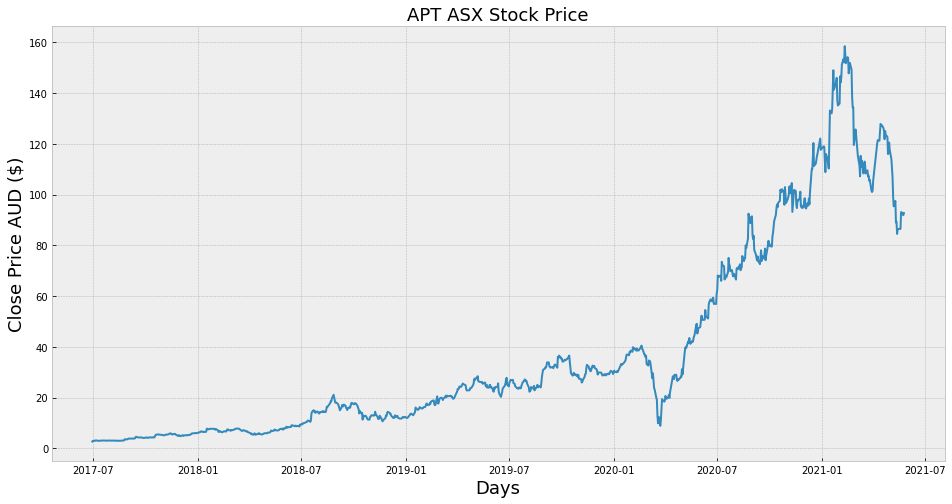

In [ ]:
# plot the historic data
plt.figure(figsize=(16,8))
plt.title('APT ASX Stock Price', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price AUD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [ ]:
dfma = df.rolling(7).mean().head(20)
dfma

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-07,2.964286,3.047143,2.928571,3.012857,3.012857,173662.142857
2017-07-10,3.028571,3.111429,2.957143,3.045714,3.045714,227674.428571
2017-07-11,3.058571,3.128571,2.987143,3.054286,3.054286,263808.857143


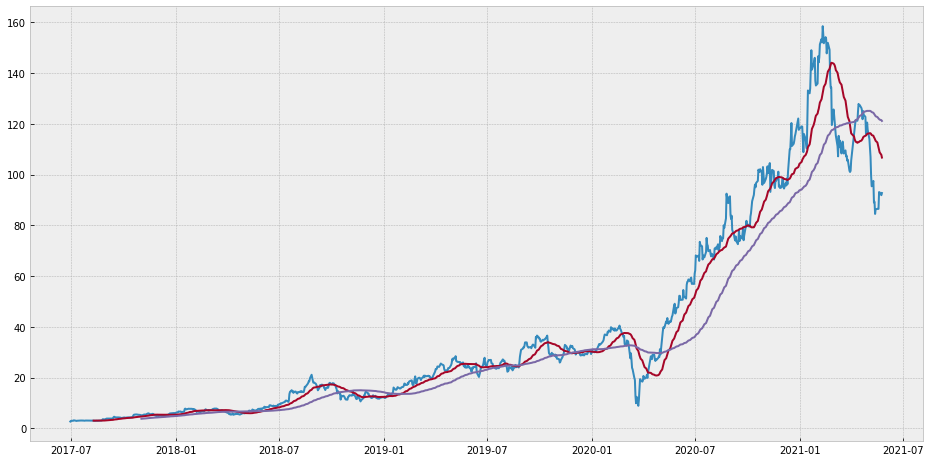

In [ ]:
df['close: 30 day MA']= df['Close'].rolling(window=30).mean()
df['close: 90 day MA']= df['Close'].rolling(window=90).mean()
plt.figure(figsize=(16,8))
plt.plot(df[['Close','close: 30 day MA','close: 90 day MA']])

In [ ]:
#dataframe for closing price
df = df[['Close']]
df.head(4)

,Close
Date,
2017-06-29,2.70
2017-06-30,2.95
2017-07-03,3.00
2017-07-04,3.00


In [ ]:
#Create a variable to predict 'x' days out into the future
future_days = 125

#Create a new column (target ) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)

,Close,Prediction
Date,,
2021-05-20,93.099998,NaN
2021-05-21,93.000000,NaN
2021-05-24,91.889999,NaN
2021-05-25,92.730003,NaN


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
#print(X)

In [ ]:
y = np.array(df['Prediction'])[:-future_days]
#print(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the feature data, 
#all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
#x_future

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[101.139999   95.93       95.809998   94.699997   95.010002   98.300003
  98.559998   96.199997   94.5        96.599998   95.68       98.449997
  96.18      101.010002  109.93      110.        110.        120.309998
 111.290001  112.150002  113.290001  114.989998  115.949997  111.849998
 117.8149985 117.8149985 135.100006  118.900002  113.559998  108.849998
 135.100006  115.949997  111.849998  110.260002  141.        133.149994
 151.300003  134.        141.        149.        141.330002  143.460007
 146.        136.970001  135.100006  135.869995  152.100006  144.220001
 146.309998  151.300003  149.        152.100006  144.220001  132.904999
 151.740005  154.149994  153.460007  147.770004  149.990005  151.919998
 149.190002  138.460007  134.360001  134.360001  119.519997  125.660004
 151.919998  120.760002  118.32      115.400002  111.199997  107.190002
 115.260002  112.989998  151.300003  108.330002  111.709999  112.989998
 132.904999  153.460007  109.529999  149.990005  107.190002  105

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


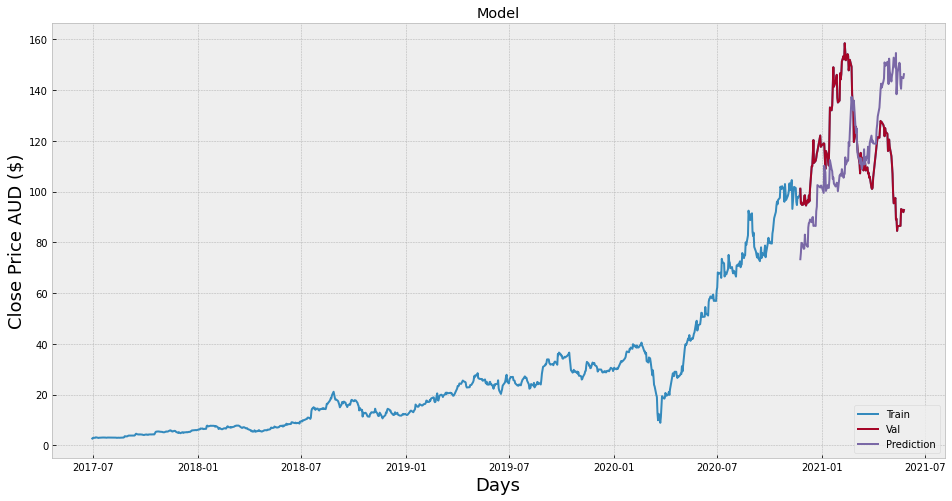

In [ ]:
#Visualize the data of linear regression model prediction
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
#Create a new column called 'Predictions' that will hold the predicted prices
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price AUD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


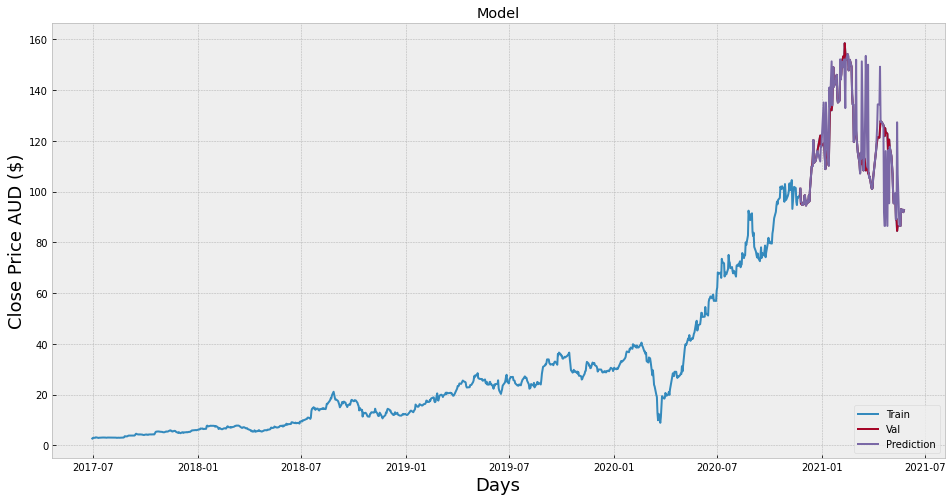

In [ ]:
#Visualize the data of decision tree regressor model prediction
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
#Create a new column called 'Predictions' that will hold the predicted prices
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price AUD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()